# XGBoost

Utilizaremos este método para predecir el precio de una vivienda. Por lo tanto, Precio es la variable objetivo, es decir, aquella que el modelo va a utilizar para aprender.

In [137]:
# Importamos pandas y creamos el dataframe que contiene los datos
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
df_properties = pd.read_csv('../data/properties_EDA_final.csv')

### DataFrame

In [138]:
df_properties

,administración,estrato,antiguedad,área,habitaciones,baños,garajes,elevadores,tipo_de_inmueble,porteria,precio,Localidad,Tasa_Homicidios_100k,Tasa_Hurtos_100k,incluye_remodelado,incluye_deposito,incluye_zona_de_lavanderia,incluye_gas,incluye_parqueadero
0,532000,4,37,86.0,1,1,1,1,Apartamento,24 hrs,313900000.0,CHAPINERO,5.2,1050.0,True,False,False,True,False
1,0,6,7,77.0,1,2,2,1,Apartamento,24 hrs,440100000.0,USAQUEN,8.5,850.0,True,True,False,True,True
2,811893,4,14,109.0,3,4,2,1,Apartamento,24 hrs,495000000.0,USAQUEN,8.5,850.0,True,False,False,True,True
3,400200,4,11,76.0,3,2,1,2,Apartamento,24 hrs,442300000.0,SUBA,9.8,750.0,True,False,False,True,True
4,270000,4,20,105.0,4,2,1,0,Casa,24 hrs,387000000.0,USAQUEN,8.5,850.0,True,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,155000,2,10,57.0,2,1,0,0,casa con conjunto cerrado,24 hrs,190000000.0,ENGATIVA,11.3,790.0,True,False,False,True,True
581,0,4,6,51.0,1,2,1,1,Apartamento,24 hrs,366000000.0,PUENTE ARANDA,15.9,870.0,True,False,True,True,True
582,55000,2,17,50.0,3,1,0,0,Apartamento,No,127000000.0,BOSA,21.5,880.0,True,False,False,True,False
583,816600,6,32,112.0,3,2,2,1,Apartamento,24 hrs,500000000.0,USAQUEN,8.5,850.0,True,True,False,True,True


### Convertir 'estrato' a tipo categoría

In [139]:
# La Columna estrato es numerica, sin embargo esta refleja una categoria.
# Procedemos a convertirla a tipo categoria.
df_properties['estrato'] = df_properties['estrato'].astype('category')

In [140]:
# Verificamos los tipos de datos en el DataFrame
df_properties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   administración              585 non-null    int64   
 1   estrato                     585 non-null    category
 2   antiguedad                  585 non-null    int64   
 3   área                        585 non-null    float64 
 4   habitaciones                585 non-null    int64   
 5   baños                       585 non-null    int64   
 6   garajes                     585 non-null    int64   
 7   elevadores                  585 non-null    int64   
 8   tipo_de_inmueble            585 non-null    object  
 9   porteria                    585 non-null    object  
 10  precio                      585 non-null    float64 
 11  Localidad                   585 non-null    object  
 12  Tasa_Homicidios_100k        585 non-null    float64 
 13  Tasa_Hurtos_100k    

## Preparación de Datos:

### 1. Definir columnas categóricas y numéricas

In [141]:
categorical_columns = ['estrato', 'tipo_de_inmueble', 'porteria', 'Localidad',
                       'incluye_remodelado', 'incluye_deposito', 'incluye_zona_de_lavanderia',
                       'incluye_gas', 'incluye_parqueadero']

numerical_cols = df_properties.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('precio')  # Excluye la variable objetivo

* Se excluye la variable 'precio' dado que este es el objetivo.

### 2. Separar variables predictoras y objetivo

In [142]:
X = df_properties.drop(columns=['precio'])
y_log = np.log(df_properties['precio'])

### 3. Dividir en conjunto de entrenamiento y prueba

In [143]:
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

### 4. Definir el pipeline de preprocesamiento

* Usamos pipeline para combinar los preprocesamiento de escalado, codificación.

In [145]:
# Codificación de variables categóricas y escalado de variables numéricas
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
])

## Modelado XGBoost

### 1. Crear modelo

In [146]:
# Definir el pipeline de preprocesamiento y modelo
model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])

### 2. Entrenar el modelo

In [147]:
model_pipeline.fit(X_train, y_train_log)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### 3. Realizar predicciones

In [150]:
y_pred_log = model_pipeline.predict(X_test)

#### 4. Convertir predicciones a escala original

In [151]:
y_pred = np.exp(y_pred_log)
y_test = np.exp(y_test_log)

#### 5. Evaluar el modelo

In [164]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R-squared: {r2:.4f}")

RMSE: 49748938.92
R-squared: 0.8905


 * El Root Mean Squared Error (RMSE) indica que, en promedio, el modelo se equivoca por aproximadamente 49.7 millones de pesos colombianos al predecir el precio de una propiedad.

* El coeficiente de determinación ( R-squared (R²)), indica que,  el modelo explica aproximadamente el 89.05% de la variabilidad en los precios.

## Visulizaciones

### Gráfica de las características mas importantes

C:\Users\sharo\AppData\Local\Temp\ipykernel_12112\553045391.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Característica', data=top_15_importance_df, palette=palette)


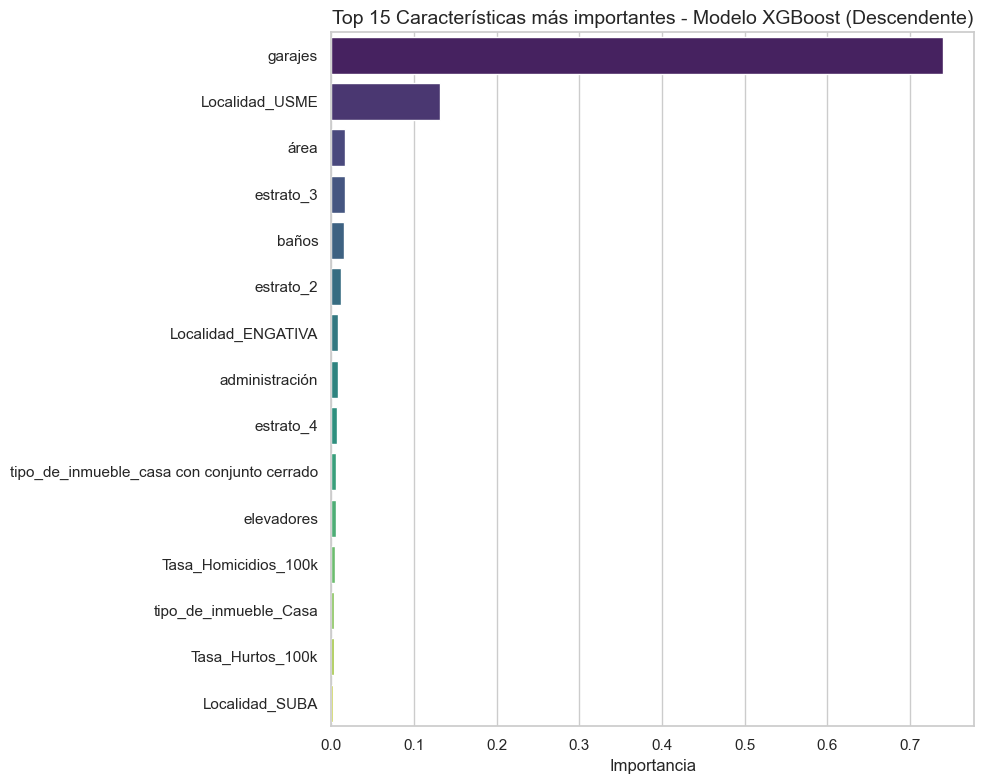

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Extraer el modelo XGBoost del pipeline
model = model_pipeline.named_steps['regressor']

# Obtener nombres de características y limpiar prefijos
raw_feature_names = model_pipeline.named_steps['preprocessor'].get_feature_names_out()
clean_feature_names = [name.split('__')[-1] for name in raw_feature_names]

# Crear DataFrame con importancias
importance_df = pd.DataFrame({
    'Característica': clean_feature_names,
    'Importancia': model.feature_importances_
})

# Seleccionar las 15 más importantes en orden descendente
top_15_importance_df = importance_df.sort_values(by='Importancia', ascending=False).head(15)

# Crear gráfico con Seaborn
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
palette = sns.color_palette("viridis", len(top_15_importance_df))
sns.barplot(x='Importancia', y='Característica', data=top_15_importance_df, palette=palette)

# Título y etiquetas
plt.title('Top 15 Características más importantes - Modelo XGBoost (Descendente)', fontsize=14)
plt.xlabel('Importancia', fontsize=12)
plt.ylabel('')

plt.tight_layout()
plt.show()

* La característica garajes tiene una importancia relativa de 0.707, lo que significa que es el factor más determinante en el precio de la vivienda.

* El modelo está muy sesgado hacia garajes, lo que puede ser lógico si en tu dataset las propiedades con más garajes son mucho más costosas.

* Localidad_USME (0.059) y área (0.045) son las siguientes variables más relevantes.

### Curva de aprendizaje

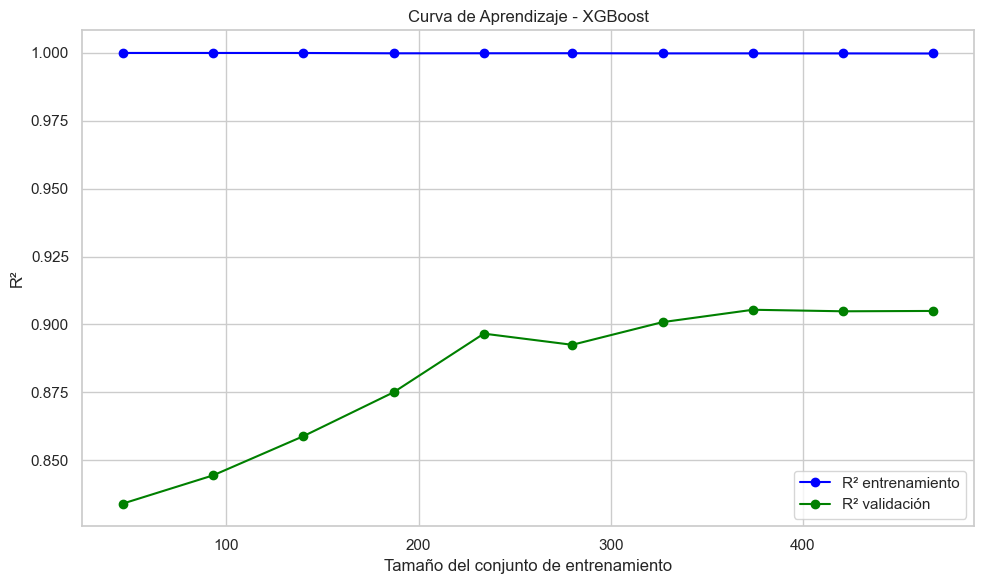

In [165]:
from sklearn.model_selection import learning_curve
# Generar curva de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
    model_pipeline, X, y_log, cv=5, scoring='r2',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

# Calcular medias
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Graficar curva
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='R² entrenamiento')
plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='R² validación')
plt.title('Curva de Aprendizaje - XGBoost')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('R²')
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


### Gráfica de valores reales vs predichos

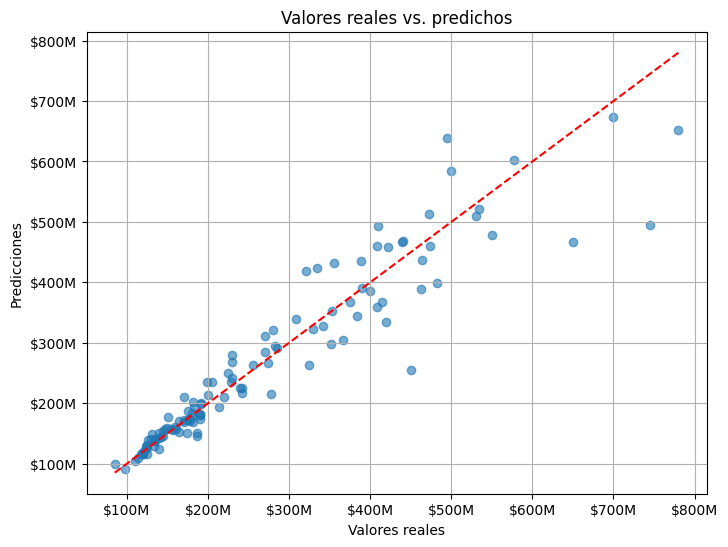

In [155]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Función para formatear en COP millones
def formato_cop_millones(x, pos):
    millones = x / 1_000_000
    return f"${millones:.0f}M"

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Valores reales vs. predicciones')
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')

# Aplicar formato en millones
plt.gca().xaxis.set_major_formatter(FuncFormatter(formato_cop_millones))
plt.gca().yaxis.set_major_formatter(FuncFormatter(formato_cop_millones))

plt.grid()
plt.show()

Este gráfico determina que el modelo tiene buen ajuste general, tendendial lineal correcta, en valores altos y sesho mínimo en valores bajos.

## Ejemplo de predicción del modelo

In [171]:
nueva_vivienda = pd.DataFrame([{
    'estrato': 3,
    'tipo_de_inmueble': 'Apartamento',
    'porteria': True,
    'Localidad': 'Chapinero',
    'incluye_remodelado': False,
    'incluye_deposito': True,
    'incluye_zona_de_lavanderia': True,
    'incluye_gas': True,
    'incluye_parqueadero': True,
    'garajes': 1,
    'área': 80,
    'baños': 2,
    'administración': 150000,
    'habitaciones': 3,       # Agregado
    'elevadores': 1,         # Agregado
    'antiguedad': 10,        # Agregado
    'Tasa_Homicidios_100k': 12.5,
    'Tasa_Hurtos_100k': 45.3
}])

nueva_vivienda[['porteria', 'incluye_remodelado', 'incluye_deposito',
                'incluye_zona_de_lavanderia', 'incluye_gas', 'incluye_parqueadero']] = \
nueva_vivienda[['porteria', 'incluye_remodelado', 'incluye_deposito',
                'incluye_zona_de_lavanderia', 'incluye_gas', 'incluye_parqueadero']].astype(str)

prediccion_log = model_pipeline.predict(nueva_vivienda)
prediccion_cop = np.exp(prediccion_log)  # Convertir de escala logarítmica a COP
print(f"Precio estimado: ${prediccion_cop[0]:,.0f} COP")

Precio estimado: $315,820,448 COP
